<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/Ex_8_1~7_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATION_BS2

---
# 8. 영화리뷰 텍스트 감성분석하기

---

<br>

---
## 8-1. 들어가며

---

자연어 처리에 주로 활용되는 RNN(Recurrent Neural Network)

컴퓨터 비전에서만 사용되는 줄 알았던 CNN(Convolutional Neural Network)이 자연어 처리에서 사용될 수도 있다

네이버나 다음 영화에서 확인할 수 있는 영화리뷰에 대한 ***감성분석(sentiment analysis)*** 를 진행


학습목표
* 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해한다.
* RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해한다.
* 1-D CNN으로도 텍스트를 처리할 수 있음을 이해한다.
* IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행한다.

<br>

---
## 8-2. 텍스트 감정분석의 유용성

---

딥러닝을 통해 텍스트에 담긴 감성을 분석(Sentimental Analysis)하는 방법을 학습.

구체적으로는, IMDb나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이,<br>
&nbsp;&nbsp;긍정적인지 혹은 부정적인지를 분류(Classification) 할 수 있는 딥러닝 모델을 만들어 볼 것입니다.



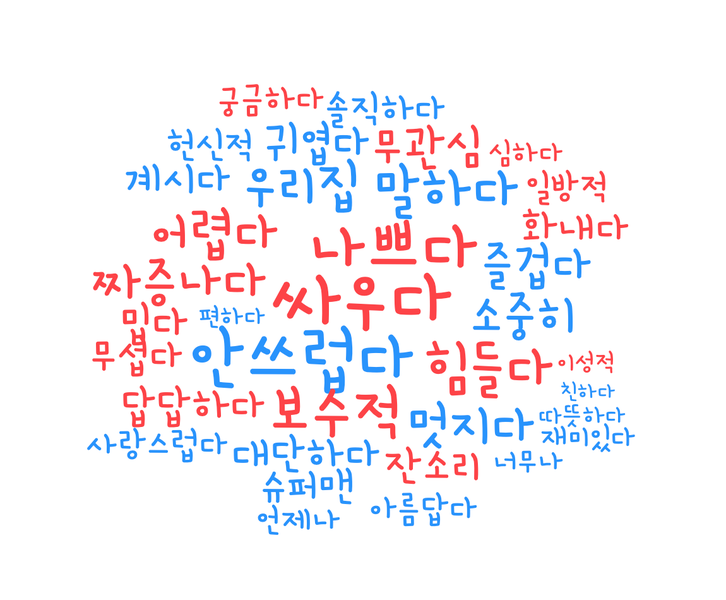

[텍스트에 담긴 미묘한 어감의 차이를 기계가 이해할 수 있게 하려면 어떻게 해야 할까요?]

---
그런데 딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용할까요?<br>
이 막연한 질문을 좀 더 세부적인 질문으로 잘게 쪼개면,<br>
&nbsp;&nbsp;다음과 같은 질문들로 나눠볼 수 있을 것입니다.

* 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?
* 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?
* 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?
* 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

---
이 질문들에 답을 제공하는 유용한 아티클 하나를 소개하겠습니다.<br>
이 아티클을 정독하시면서 위 질문들에 대한 답을 찾아서 스스로 정리해 보시기 바랍니다.<br>
하지만 정답이 있는 것은 아닙니다.<br>
이 아티클을 통해 산업 현장에서 텍스트 분류가 실제로 활용되는 구체적인 사례도 확인할 수 있습니다.<br>
<br>
▣ 동아비즈니스리뷰 '감성분석' 활용 사례 기고<br>
https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine

감성을 표현하는 이들의 감정(emotion), 감성(sentiment), 태도(attitude), 입장(stance) 등을 분석한다.

---

---
Q1. 텍스트 데이터에서만 얻을 수 있는 유용한 정보는 무엇인가요? 그 유용성은 텍스트 데이터의 어떤 특징으로부터 비롯되는 것인가요?<br>
<br>
**예시답안**<br>
SNS 등에서 광범위한 분량의 텍스트 데이터를 쉽게 얻을 수 있는데,<br>
이 데이터는 소비자들의 개인적, 감성적 반응이 직접 담겨 있을뿐더러 실시간 트렌드를 빠르게 반영하는 데이터이기도 하다.

---

---
Q2. 텍스트 감성분석 접근법을 크게 2가지로 나누면 무엇과 무엇이 있나요?<br>
<br>
**예시답안**<br>
기계학습 기반 접근법과 감성사전 기반 접근법

---

---
Q3. 사전 기반의 감성분석이 기계학습 기반 접근법 대비 가지는 한계점을 2가지만 들어 주세요.<br>
<br>
**예시답안**<br>
1.분석 대상에 따라 단어의 감성 점수가 달라질 수 있다는 가능성에 대응하기 어렵다.<br>
2.단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성 분석이 어렵다.<br>

---

---
Q4. 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 도움을 줄 수 있나요?<br>
<br>
**예시답안**<br>
일반적인 데이터분석 업무는 범주화가 잘 된 정형데이터를 필요로 하는데,<br>
이런 데이터를 큰 규모로 구축하기 위해서 많은 비용이 들지만,<br>
쉽게 구할 수 있는 비정형데이터인 텍스트에 감성분석 기법을 적용하면,<br>
텍스트를 정형데이터로 가공하여 유용한 의사결정 보조자료로 활용할 수 있게 된다.

---

---
Q5. 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법에는 무엇이 있나요?<br>
<br>
**예시답안**<br>
단어의 특성을 저차원 벡터값으로 표현할 수 있는 워드 임베딩(word embedding) 기법

---

<br>

---
## 8-3. 텍스트 데이터의 특징

---

인공지능 모델을 입력과 출력이 정해진 함수라고 생각해 봅시다.<br>
예를 들어 MNIST 숫자 분류기 모델이라면,<br>
&nbsp; 이미지 파일을 읽어 들인 매트릭스가 입력이 되고,<br>
&nbsp; 이미지 파일에 쓰여 있는 실제 숫자 값이 출력이 되는 함수가 될 것입니다.<br>
<br>
이제 텍스트 문장을 입력으로 받아서 그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 생각해 봅시다.<br>
이 모델을 만들기 위해서는 숫자 분류기를 만들 때는 생각할 필요가 없었던 2가지 문제가 생깁니다.<br>
* 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?
* 텍스트에는 순서가 중요합니다. 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

<br>

---
## 8-4. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법

---

인공지능 모델의 입력이 될 수 있는 것은 0과 1의 비트로 표현 가능한 숫자만으로 이루어진 매트릭스일 뿐입니다.<br>
아주 단순히, A=0, B=1, ..., Z=25 라고 숫자를 임의로 부여한다고 해봅시다.<br>
그러면 의미적으로 A와 B는 1만큼 멀고, A와 Z는 25만큼 멀까요?<br>
그렇지 않습니다.<br>
텍스트의 중요한 특징은 그 자체로는 기호일 뿐이며,<br>
텍스트가 내포하는 의미를 기호가 직접 내포하지 않는다는 점입니다.

하지만 우리는 우선 단어 사전을 만들어 볼 수는 있습니다.<br>
우리가 사용하는 국어, 영어 사전에는 단어와 그 의미 설명이 짝지어져 있습니다.<br>
우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것입니다.<br>
그런데 그 벡터는 어디서 가져올까요?<br>
그렇습니다. 우리는 딥러닝을 통해 그 벡터를 만들어 낼 수 있습니다.

아래와 같이 단 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제를 생각해 보겠습니다.

>i feel hungry<br>
>i eat lunch<br>
>now i feel happy

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences = ['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [3]:
word_to_index = {word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
type(word_to_index)

dict

In [5]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [6]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


get_encoded_sentence 함수를 통해 아래와 같이 매핑된 것이 확인되시나요?

* \<BOS> → 1
* i → 3
* eat → 6
* lunch → 7

In [7]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [8]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [9]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


<br>

---
## 8-5. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장

---

텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다.<br>
'i feel hungry'가 1, 3, 4, 5 로 변환되었지만 이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라,<br>
&nbsp;&nbsp;임의로 부여된 단어의 순서에 불과합니다.<br>
<br>
우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다.<br>
그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화하게 됩니다.<br>
Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미 벡터 파라미터를 구현한 Embedding 레이어를 제공합니다.

>임베딩(Embedding)이란?<br>
&nbsp;&nbsp;&nbsp;자연어 처리(Natural Language Processing)분야에서 임베딩(Embedding)은,<br>
&nbsp;&nbsp;&nbsp;사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자형태인 vector로 바꾼 결과 혹은 그 일련의 과정 전체를 의미한다.<br>
&nbsp;&nbsp;&nbsp;가장 간단한 형태의 임베딩은 단어의 빈도를 그대로 벡터로 사용하는 것이다.<br>
&nbsp;&nbsp;&nbsp;임베딩을 통해 할수있는 것은,<br>
&nbsp;&nbsp;&nbsp;단어나 문장 사이의 코사인 유사도가 가장 높은 단어를 구하는 등의 계산,<br>
&nbsp;&nbsp;&nbsp;단어들 사이의 의미/문법적 정보 도출 벡터 간 연산으로 단어 사이 문법적 관계 도출,<br>
&nbsp;&nbsp;&nbsp;전이 학습(transfer learning) 임베딩은 다른 딥러닝 모델의 입력값으로 자주 쓰이고,<br>
&nbsp;&nbsp;&nbsp;품질 좋은 임베딩을 쓸수록 모델의 성능이 좋아집니다.

---
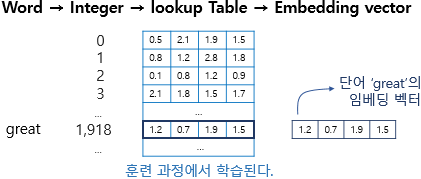<br>
[임베딩 레이어를 통해 word가 벡터화되는 과정]<br>
https://wikidocs.net/64779

---

위 그림에서 word_to_index('great')는 1918입니다.<br>
그러면 'great'라는 단어의 의미 공간상의 워드 벡터(word vector)는, Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터가 됩니다.<br>
위 그림에서는 1.2, 0.7, 1.9, 1.5가 됩니다.<br>
Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현해 보겠습니다.

In [10]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: ignored

실행해 보니 에러가 발생합니다. 왜 그럴까요?

주의해야 할 점이 있습니다.<br>
Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다.<br>
raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.<br>
<br>
Tensorflow에서는, tf.keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해,<br>
문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

In [11]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'],
                                                           padding='post',
                                                           maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다.<br>
\<PAD> 가 0 에 매핑되어 있다는 걸 기억하세요.

그러면 위에 시도했던 output = embedding(raw_inputs)을 다시 시도해 봅시다.

In [12]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'],
                                                           padding='post',
                                                           maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.01655335 -0.00832702 -0.01205438  0.04993408]
  [ 0.00866544 -0.0144177   0.03299046  0.04868592]
  [-0.02956924 -0.03141509  0.02924318  0.01914063]
  [ 0.04146953 -0.01375805 -0.03901231 -0.01889317]
  [ 0.00185311  0.04993119 -0.0200802  -0.01675608]]

 [[-0.01655335 -0.00832702 -0.01205438  0.04993408]
  [ 0.00866544 -0.0144177   0.03299046  0.04868592]
  [ 0.01283369 -0.0102841   0.03355188 -0.00570942]
  [ 0.00859307 -0.02102432  0.0458563   0.0136455 ]
  [ 0.00185311  0.04993119 -0.0200802  -0.01675608]]

 [[-0.01655335 -0.00832702 -0.01205438  0.04993408]
  [-0.04927368  0.04972145  0.02229014 -0.02667749]
  [ 0.00866544 -0.0144177   0.03299046  0.04868592]
  [-0.02956924 -0.03141509  0.02924318  0.01914063]
  [ 0.03221797  0.02199699  0.0098318  -0.01633223]]], shape=(3, 5, 4), dtype=float32)


---
Q6. output의 shape=(3, 5, 4)에서 3, 5, 4의 의미는 각각 무엇일까요?<br>
<br>
**나의 답변**<br>
3은,
 3개의 문장이 들어왔고,

5는,
 문장 중 가장 긴 것이 4개 단어인데, 앞에 <BOS> 추가된 것에 맞춘 것이고,

4는,
 4차원으로 하겠다는 뜻
<br>
<br>
**예시답안**<br>
3은 입력문장 개수, 5는 입력문장의 최대 길이, 4는 워드 벡터의 차원 수

---




<br>

---
## 8-6. 시퀀스 데이터를 다루는 RNN

---

텍스트 데이터를 다루는 데 주로 사용되는 딥러닝 모델은 바로 Recurrent Neural Network(RNN)입니다.<br>
RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있습니다.

텍스트 데이터도 시퀀스 데이터라는 관점으로 해석할 수 있습니다만,<br>
시퀀스 데이터의 정의에 가장 잘 어울리는 것은 음성 데이터가 아닐까 합니다.<br>
시퀀스 데이터란 바로 입력이 시간 축을 따라 발생하는 데이터입니다.<br>
예를 들어 이전 스텝의 'i feel hungry'라는 문장을 누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음했다고 합시다.

>at time=0s : 듣는이의 귀에 들어온 input='i'<br>
>at time=1s : 듣는이의 귀에 들어온 input='feel'<br>
>at time=2s : 듣는이의 귀에 들어온 input='hungry'

time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지입니다.<br>
그다음에 'hungry'가 올지, 'happy'가 올지 알 수 없는 상황입니다.<br>
RNN은 그런 상황을 묘사하기에 가장 적당한 모델 구조를 가지고 있습니다.<br>
왜냐하면 RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 현재 상태를 묘사하는 state machine으로 설계되었기 때문입니다.

State가 무엇인지 이해를 돕기 위해 다음 그림을 보면서 질문에 대답해 봅시다.
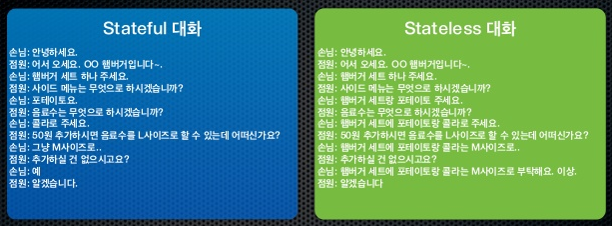<br>
[State가 유지된다는 것의 의미]<br>
https://www.slideshare.net/xguru/ss-16106464

---
Q7. 위 그림에서 대화가 stateful한지 stateless한지 결정하는 것은 직원인가요, 아니면 손님인가요? 그렇게 생각하는 이유는 무엇인가요?<br>
<br>
**예시답안**<br>
Stateful한 대화에서는 손님이 이전 시점에 어떤 선택을 했는지 직원이 기억을 하지만,<br>
Stateless한 대화에서는 직원이 기억하지 못한다.<br>
그래서 손님 스스로 본인이 이전 시점에 했던 선택을 모두 기억하고 있다가 직원에게 매번 새롭게 전달해야 한다.<br>
손님의 이전 주문내역을 기억하는 직원은 stateful하고, 그렇지 못한 직원은 stateless하다.

---

---
다음 동영상을 통해 RNN의 기본 개념과 설계 구조를 좀 더 구체적으로 확인해 본 후 다음 질문에 대답해 봅시다.

▣ 김성훈 교수의 모두의 딥러닝 강좌 12강.RNN<br>
https://youtu.be/-SHPG_KMUkQ

---

---
Q8. RNN의 정의대로라면 t=4 시점의 state h4는 t=4 시점의 input x4와 t=3 시점의 state h3가 결정합니다.<br>
그렇다면 h4에는 t<4 이전의 입력 x1, x2, x3의 정보는 반영되지 않는 것일까요?<br>
<br>
**예시답안**<br>
그렇지 않습니다. h4를 결정하는 이전 state h3 안에 x3의 정보가 반영되어 있고, 같은 원리로 이전 시점의 모든 입력의 정보가 현재 상태에 반영될 수 있습니다.

---

그러면 RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현해 보겠습니다.

In [13]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 4)           40        
                                                                 
 lstm (LSTM)                 (None, 8)                 416       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


---
▣ 시퀀스 자료형과 RNN (24~25분)

https://www.youtube.com/watch?v=mG6N0ut9dog&t=1447s

---


<br>

---
## 8-7. 꼭 RNN이어야 할까?

---

텍스트를 처리하기 위해 RNN이 아니라 1-D Convolution Neural Network(1-D CNN)를 사용할 수도 있습니다.<br>
우리는 이미지 분류기를 구현하면서 2-D CNN을 이미 사용해 본 바 있습니다.<br>
이미지는 시퀀스 데이터가 아닙니다.<br>
이미지 분류기 모델에는 이미지 전체가 한꺼번에 입력으로 사용됩니다.<br>
그러므로 1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서,<br>
7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됩니다.<br>
이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여줍니다.<br>
그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점이 있습니다.

In [14]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 4)           40        
                                                                 
 conv1d (Conv1D)             (None, None, 16)          464       
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 16)          1808      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 8)                

아주 간단히는 GlobalMaxPooling1D() 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다.<br>
이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여<br>
그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데, 의외로 성능이 잘 나올 수도 있습니다.

In [15]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 4)           40        
                                                                 
 global_max_pooling1d_1 (Glo  (None, 4)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


---
이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나,<br>
FFN(FeedForward Network) 레이어만으로 구성하거나,<br>
혹은 최근 각광받고 있는 Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있습니다.<br>
조금더 깊게 알고 싶다면 아래를 참고 하세요

▣ 자연어 처리를 위한 1D CNN(1D Convolutional Neural Networks)<br>
https://wikidocs.net/80437

---